## Calculation

In [ ]:
import pandas as pd
import numpy as np

file_path = 'dataset//wealth_factor.csv'
df = pd.read_csv(file_path,index_col=["Country","Field"]).drop("Unnamed: 0",axis=1)
df.head()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def regress(years_learning, ys, years_predict, retype='linear', fit_intercept=True, degree=None):
    if retype == 'linear':
        lm = LinearRegression(fit_intercept=fit_intercept)
    elif retype == 'polynomial':
        lm = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                   ('linear', LinearRegression(fit_intercept=fit_intercept))])
    else:
        return print('Need to specify other regression type.')
    lm.fit(years_learning,ys)
    return lm.predict(years_predict)

In [3]:
# Linear regression example
years_learning = np.array([int(i) for i in df.columns]).reshape(-1, 1)
to_predict = np.array([range(2010,2023)]).reshape(-1, 1)
result = np.array(list(map(lambda x: regress(years_learning, x.reshape(-1, 1), to_predict, retype='linear'), df.to_numpy())))

In [4]:
for i,prediction_year in enumerate(to_predict):
    df[str(prediction_year[0])]=result[:,i]
df.head()

2010  \
Country Field                                                          
Austria B. Mining and quarrying                             1.913595   
        C. Manufacturing                                    1.695954   
        D. Electricity; gas, steam and air conditioning...  2.518978   
        E. Water supply; sewerage, waste management and...  1.439189   
        F. Construction                                     1.392203   

                                                                2011  \
Country Field                                                          
Austria B. Mining and quarrying                             1.897128   
        C. Manufacturing                                    1.663734   
        D. Electricity; gas, steam and air conditioning...  2.467419   
        E. Water supply; sewerage, waste management and...  1.406647   
        F. Construction                                     1.353659   

                                                                2012  \
Country Field                                                          
Austria B. Mining and quarrying                             1.880662   
        C. Manufacturing                                    1.631514   
        D. Electricity; gas, steam and air conditioning...  2.415860   
        E. Water supply; sewerage, waste management and...  1.374105   
        F. Construction                                     1.315114   

                                                                2013  \
Country Field                                                          
Austria B. Mining and quarrying                             1.864195   
        C. Manufacturing                                    1.599293   
        D. Electricity; gas, steam and air conditioning...  2.364302   
        E. Water supply; sewerage, waste management and...  1.341562   
        F. Construction                                     1.276569   

                                                                2014  \
Country Field                                                          
Austria B. Mining and quarrying                             1.847728   
        C. Manufacturing                                    1.567073   
        D. Electricity; gas, steam and air conditioning...  2.312743   
        E. Water supply; sewerage, waste management and...  1.309020   
        F. Construction                                     1.238024   

                                                                2015  \
Country Field                                                          
Austria B. Mining and quarrying                             1.831262   
        C. Manufacturing                                    1.534853   
        D. Electricity; gas, steam and air conditioning...  2.261184   
        E. Water supply; sewerage, waste management and...  1.276478   
        F. Construction                                     1.199480   

                                                                2016  \
Country Field                                                          
Austria B. Mining and quarrying                             1.814795   
        C. Manufacturing                                    1.502633   
        D. Electricity; gas, steam and air conditioning...  2.209626   
        E. Water supply; sewerage, waste management and...  1.243936   
        F. Construction                                     1.160935   

                                                                2017  \
Country Field                                                          
Austria B. Mining and quarrying                             1.798329   
        C. Manufacturing                                    1.470412   
        D. Electricity; gas, steam and air conditioning...  2.158067   
        E. Water supply; sewerage, waste management and...  1.211394   
        F. Construction                                     1.122390   

                        

In [5]:
df.to_csv("dataset//trends_real_wealth_from_2010_to_2022.csv")

## Analysis

In [6]:
df["diff"]=df["2021"]-df["2020"]
df.head()

2010  \
Country Field                                                          
Austria B. Mining and quarrying                             1.913595   
        C. Manufacturing                                    1.695954   
        D. Electricity; gas, steam and air conditioning...  2.518978   
        E. Water supply; sewerage, waste management and...  1.439189   
        F. Construction                                     1.392203   

                                                                2011  \
Country Field                                                          
Austria B. Mining and quarrying                             1.897128   
        C. Manufacturing                                    1.663734   
        D. Electricity; gas, steam and air conditioning...  2.467419   
        E. Water supply; sewerage, waste management and...  1.406647   
        F. Construction                                     1.353659   

                                                                2012  \
Country Field                                                          
Austria B. Mining and quarrying                             1.880662   
        C. Manufacturing                                    1.631514   
        D. Electricity; gas, steam and air conditioning...  2.415860   
        E. Water supply; sewerage, waste management and...  1.374105   
        F. Construction                                     1.315114   

                                                                2013  \
Country Field                                                          
Austria B. Mining and quarrying                             1.864195   
        C. Manufacturing                                    1.599293   
        D. Electricity; gas, steam and air conditioning...  2.364302   
        E. Water supply; sewerage, waste management and...  1.341562   
        F. Construction                                     1.276569   

                                                                2014  \
Country Field                                                          
Austria B. Mining and quarrying                             1.847728   
        C. Manufacturing                                    1.567073   
        D. Electricity; gas, steam and air conditioning...  2.312743   
        E. Water supply; sewerage, waste management and...  1.309020   
        F. Construction                                     1.238024   

                                                                2015  \
Country Field                                                          
Austria B. Mining and quarrying                             1.831262   
        C. Manufacturing                                    1.534853   
        D. Electricity; gas, steam and air conditioning...  2.261184   
        E. Water supply; sewerage, waste management and...  1.276478   
        F. Construction                                     1.199480   

                                                                2016  \
Country Field                                                          
Austria B. Mining and quarrying                             1.814795   
        C. Manufacturing                                    1.502633   
        D. Electricity; gas, steam and air conditioning...  2.209626   
        E. Water supply; sewerage, waste management and...  1.243936   
        F. Construction                                     1.160935   

                                                                2017  \
Country Field                                                          
Austria B. Mining and quarrying                             1.798329   
        C. Manufacturing                                    1.470412   
        D. Electricity; gas, steam and air conditioning...  2.158067   
        E. Water supply; sewerage, waste management and...  1.211394   
        F. Construction                                     1.122390   

                        

In [9]:
df["diff"][df["diff"]>0]

Country      Field                                                                     
Colombia     F. Construction                                                               0.002025
Egypt        P. Education                                                                  0.002704
Estonia      P. Education                                                                  0.002289
Mexico       C. Manufacturing                                                              0.008957
Philippines  B. Mining and quarrying                                                       0.003399
             D. Electricity; gas, steam and air conditioning supply                        0.001509
             J. Information and communication                                              0.005596
             S. Other service activities                                                   0.000165
             Public Administration, Community, Social and other Services and Activities    0.006738
Ukraine     

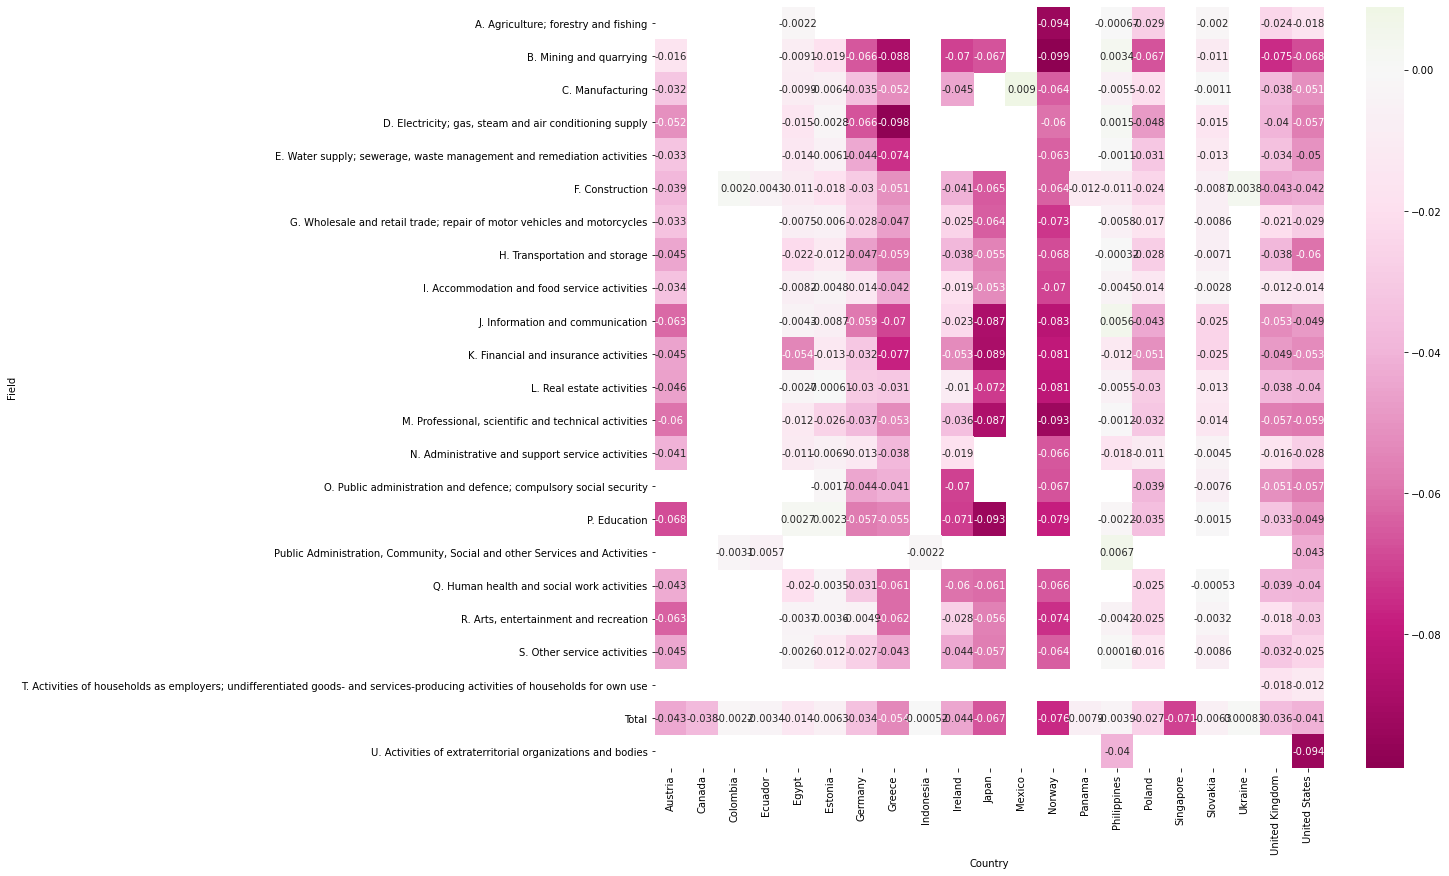

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
table = df.pivot_table(
        values='diff', 
        index="Field", 
        columns='Country')

fig, plot = plt.subplots(figsize = (15,14))
plot = sns.heatmap(table,cmap="PiYG",annot=True,center=0)